# Module 02 - Part 03

Module 2 is a direct translation from R to Python based on the Advanced R tutorials (AdvanceR_Part3.Rmd) by Shao-Fang Wang in 2020. 

Many people have contributed to developing and revising the R tutorial material (which is what this Python tutorial is based on) over the years: 
Anna Khazenzon, Cayce Hook, Paul Thibodeau, Mike Frank, Benoit Monin, Ewart Thomas, Michael Waskom, Steph Gagnon, Dan Birman, Natalia Velez, Kara Weisman, Andrew Lampinen, Joshua Morris, Yochai Shavit, Jackie Schwartz, Arielle Keller, and Leili Mortazavi.   

### Welcome to part 3!

#### Logistic regression
To investigate such relationships when our outcome variable is binary (e.g., 0 or 1), we'll need to use logistic regression in place of linear regression. The Python function that allows this (and other types of generalized linear regression) is [`sm.GLM`](https://www.statsmodels.org/stable/glm.html). Check out the help for it, and see if you can figure out how to run a logistic regression with one or more of condition, rt, and experiment stage as predictors!

Let's try to predict party affiliation (our binary outcome variable) from age and optimism!

Try running this logistic regression model, using the same type of formula setup as with linear regression. We'll use the dataframe `df_dr` and the `party_cat` variable, so that we're restricted to Democrats or Republicans coded as a binary factor. 

In [1]:
import numpy
import pandas
import statsmodels.api as sm
#for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn

In [2]:
df_survey = pandas.read_csv('https://raw.githubusercontent.com/lampinen/R_workshop_materials/master/data/fieldsimul1.csv')

In [7]:
df_dr=df_survey[df_survey['party'].isin([1,2])]
df_dr['party_cat']=df_dr['party']-1
df_dr['party_cat'] = df_dr['party_cat'].astype('category')
df_dr.head()

/Users/SFW_Work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/SFW_Work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,recall,prop54,party,age,optmism,agecat,recallq,party_cat
0,1,1,1,49,7,45,1,0
1,1,1,1,44,8,45,1,0
2,1,1,1,46,7,45,1,0
3,1,1,1,50,7,45,1,0
4,1,1,1,25,6,24,1,0


In [4]:
x = sm.add_constant(df_dr[['age','optmism']]) #An intercept is not included by default and should be added by the user
y = df_dr['party_cat']
model = sm.GLM(y,x,family= sm.families.Binomial())

result = model.fit()
print(result.summary())

#rs2 = lm(optmism ~ age, data = df_survey)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              party_cat   No. Observations:                  164
Model:                            GLM   Df Residuals:                      161
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.628
Date:                Mon, 10 Aug 2020   Deviance:                       185.26
Time:                        22:19:26   Pearson chi2:                     152.
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9628      0.795      3.724      0.000       1.404       4.522
age            0.0139      0.013      1.054      0.2

/Users/SFW_Work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Now let's try to visualize what this model really looks like. First, we'll access our model's predictions about party preference in our dataset using `.predict()`. Then, we'll use `seaborn` to visualize how well our model fits the data, using `x_jitter` to add some horizontal jitter (this helps us see all the points a little more easily)

In [5]:
df_predict = pandas.DataFrame({'predictions':result.predict(),
                              'optmism': df_dr['optmism']})


<Figure size 576x576 with 0 Axes>

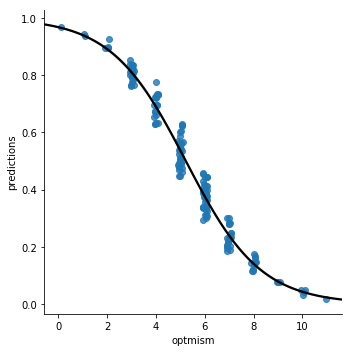

In [6]:
plt.figure(figsize=(8,8))
ax = seaborn.lmplot(x='optmism',
                    y='predictions',
                    line_kws={'color': 'black'},#change the color of the line
                    logistic = True,
                    x_jitter = 0.1,
                    data=df_predict)

#### Further practice (Stroop Dataset)

For some further practice with simple tests, let's return to the Stroop dataset.

In [19]:
stroop_data = pandas.read_csv('https://raw.githubusercontent.com/lampinen/R_workshop_materials/master/data/stroop.csv')

In [8]:
stroop_data.head()

,Unnamed: 0,condition,correct,correct_response,exp_stage,key_press,possible_responses,rt,stim_color,stim_word,trial_type,worker_id
0,stroop_0_4,incongruent,0.0,66.0,practice,71.0,"[66, 71, 82]",1339,blue,red,poldrack-categorize,s002
1,stroop_0_6,congruent,0.0,66.0,practice,71.0,"[66, 71, 82]",757,blue,blue,poldrack-categorize,s002
2,stroop_0_8,congruent,1.0,71.0,practice,71.0,"[66, 71, 82]",1086,green,green,poldrack-categorize,s002
3,stroop_0_10,congruent,1.0,82.0,practice,82.0,"[66, 71, 82]",633,red,red,poldrack-categorize,s002
4,stroop_0_12,congruent,1.0,66.0,practice,66.0,"[66, 71, 82]",983,blue,blue,poldrack-categorize,s002


We could get a general sense of the differences by condition by just using `groupby()` and `aggregate()`:

In [75]:
#Apply your knowledge








#Answer:
stroop_summary_data = stroop_data.groupby('condition')['rt'].aggregate(['mean','std'])
print(stroop_summary_data)

                   mean         std
condition                          
congruent    683.494786  206.761193
incongruent  796.379573  252.646764


We can plot this data too!We can plot this data too!

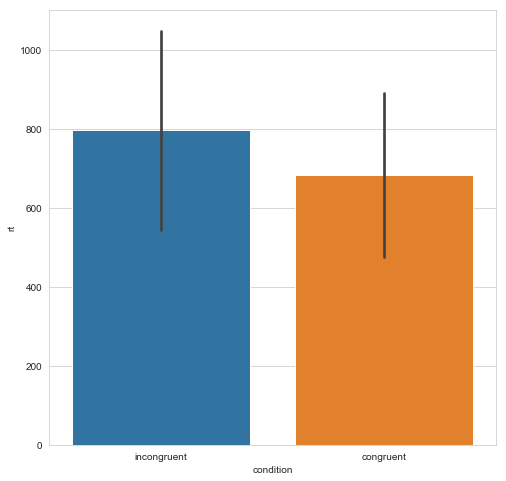

In [76]:
plt.figure(figsize=(8,8))
seaborn.set_style("whitegrid")
seaborn.barplot(x='condition',
                y='rt',
                ci="sd",# use standard deviation of observations instead of a confidence interval as error bars
                data = stroop_data)

But if you look at the data you might notice that some rt values are -1, probably indicating no response before the time limit. We definitely want to remove these before we look at the data, so let's fix that. We also might want to remove practice trials, and compare across correct and incorrect responses:

In [77]:
stroop_data_remove = stroop_data[(stroop_data['rt']>0) & (stroop_data['exp_stage']!="practice")]

In [78]:
stroop_data_remove.groupby(['condition','correct'])['rt'].aggregate(['mean','std'])

mean         std
condition   correct                        
congruent   0.0      799.054217  260.279739
            1.0      680.617931  188.429120
incongruent 0.0      850.128295  248.819621
            1.0      799.964224  219.283048

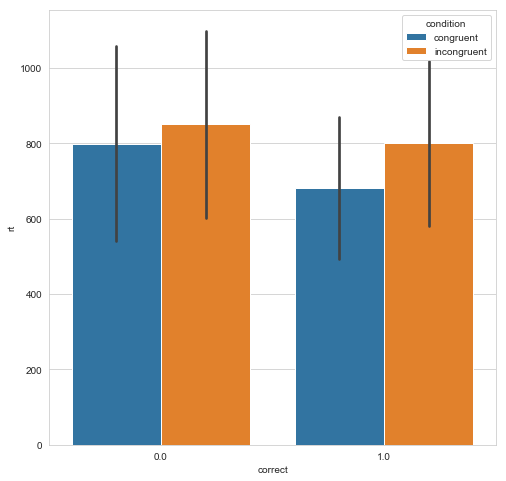

In [79]:
plt.figure(figsize=(8,8))
seaborn.set_style("whitegrid")
seaborn.barplot(x='correct',
                y='rt',
                ci="sd",# use standard deviation of observations instead of a confidence interval as error bars
                hue = "condition",
                data = stroop_data_remove)

We see the classic pattern of responses, where participants are slower on incongruent trials, as well as when they are incorrect.

For now, let's just filter out the invalid rts and from the data we are going to use.

In [80]:
filtered_stroop_data = stroop_data[stroop_data['rt']>0]

First, let's do a simple t-test on just condition

In [81]:
filtered_stroop_data_congruent = filtered_stroop_data['rt'][filtered_stroop_data['condition']=='congruent']
filtered_stroop_data_incongruent= filtered_stroop_data['rt'][filtered_stroop_data['condition']=='incongruent']
sm.stats.ttest_ind(filtered_stroop_data_congruent,filtered_stroop_data_incongruent)
#returns: t test statistic, pvalue (two tail), and df

(-44.357440651492816, 0.0, 23040.0)

There is a substantial difference! Let's try this as a linear regression now:

In [82]:
filtered_stroop_data=pandas.concat((filtered_stroop_data,
                         pandas.get_dummies(filtered_stroop_data['condition'], drop_first=True)), axis=1)
filtered_stroop_data.head()

,Unnamed: 0,condition,correct,correct_response,exp_stage,key_press,possible_responses,rt,stim_color,stim_word,trial_type,worker_id,incongruent
0,stroop_0_4,incongruent,0.0,66.0,practice,71.0,"[66, 71, 82]",1339,blue,red,poldrack-categorize,s002,1
1,stroop_0_6,congruent,0.0,66.0,practice,71.0,"[66, 71, 82]",757,blue,blue,poldrack-categorize,s002,0
2,stroop_0_8,congruent,1.0,71.0,practice,71.0,"[66, 71, 82]",1086,green,green,poldrack-categorize,s002,0
3,stroop_0_10,congruent,1.0,82.0,practice,82.0,"[66, 71, 82]",633,red,red,poldrack-categorize,s002,0
4,stroop_0_12,congruent,1.0,66.0,practice,66.0,"[66, 71, 82]",983,blue,blue,poldrack-categorize,s002,0


In [83]:
x = filtered_stroop_data['incongruent']
x = sm.add_constant(x)#An intercept is not included by default and should be added by the user
y = filtered_stroop_data['rt']
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1968.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:42:14   Log-Likelihood:            -1.5610e+05
No. Observations:               23042   AIC:                         3.122e+05
Df Residuals:                   23040   BIC:                         3.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         689.9317      1.967    350.701      

Great, we find a similar result (again, don't worry too much about interpreting this output yet).

Now, try to extend this model to also include whether the response was correct and whether it was a practice or test trial as predictors! What do you see?

In [84]:
##Apply your knowledge













# filtered_stroop_data=pandas.concat((filtered_stroop_data,
#                          pandas.get_dummies(filtered_stroop_data['correct'], drop_first=True)), axis=1)
# filtered_stroop_data.head()
# filtered_stroop_data = filtered_stroop_data.rename(columns={1.0: "correct_dummy"})
# filtered_stroop_data.head()
# x2 = filtered_stroop_data.filter(items=['incongruent','correct_dummy'])
# x2 = sm.add_constant(x2)#An intercept is not included by default and should be added by the user
# y = filtered_stroop_data['rt']
# model = sm.OLS(y,x2)
# result = model.fit()
# print(result.summary())

It looks like practice vs test might be important as well! See if you can make a plot using `seaborn` that includes all three predictors (hint: you will have to summarize the data including the new variables, and you may want to check out`?seaborn.catplot`)

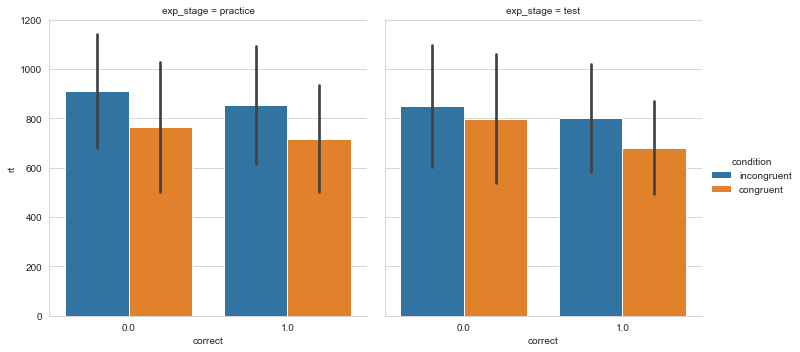

In [85]:
seaborn.catplot(x="correct", y="rt",
                hue="condition", col="exp_stage",
                data=filtered_stroop_data, kind="bar",
               ci = "sd");

Of course, you might be interested in whether answers were correct or incorrect! Since T/F values are not normally distributed, the appropriate test to use in this case is a *logistic regression* (you'll learn more about why in 252). 

In [86]:
#Apply your knowledge












#One possible answer:
# xglm = sm.add_constant(filtered_stroop_data['incongruent'])#An intercept is not included by default and should be added by the user
# yglm = filtered_stroop_data['correct_dummy']
# glmmodel = sm.GLM(yglm,xglm,family= sm.families.Binomial())

# glmresult = glmmodel.fit()
# print(glmresult.summary())

Thanks for working through these modules! If you're still not sick of playing around with Python, you can check out [this page](https://www.statsmodels.org/stable/user-guide.html#regression-and-linear-models) on more functions for performing different regression models.


